# Company Attrition Analysis

# Stage 1- Importing and Launching

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv("D:/AI-ML/Day 6/general_data.csv")
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Stage-2 Data Preparation

1) Cleaning data

In [4]:

dataset.isnull()
dataset=dataset.dropna()
print(dataset)

      Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4404   29        No      Travel_Rarely                   Sales   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences 

2) Deleting any duplicates

In [5]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4404    False
4405    False
4406    False
4407    False
4408    False
Length: 4382, dtype: bool

In [6]:
dataset.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


# Stage-3 Descriptive analysis

In [7]:
dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


# Mean

In [9]:
left = dataset.groupby('Attrition')
left.mean()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,
No,37.567038,9.232527,2.920044,1.0,2210.377482,2.069894,65684.209954,2.646451,15.157465,8.0,0.797661,11.868643,2.825129,7.367419,2.236062,4.367963
Yes,33.628369,9.024113,2.872340,1.0,2194.387234,2.032624,61814.950355,2.937589,15.487943,8.0,0.778723,8.273759,2.658156,5.148936,1.960284,2.865248


# Median

In [10]:
left.median()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,
No,36,7,3,1,2216,2,49300,2.0,14,8,1,10.0,3,6,1,3
Yes,32,7,3,1,2165,2,49080,1.0,14,8,1,7.0,3,3,1,2


# Mode

In [11]:
data_y = dataset.loc[dataset['Attrition']=='Yes']
data_y[['Age','DistanceFromHome','Education','JobLevel','MonthlyIncome','PercentSalaryHike','TotalWorkingYears']].mode()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,PercentSalaryHike,TotalWorkingYears
0,31.0,2.0,3.0,2.0,25590,13.0,1.0
1,NaN,NaN,NaN,NaN,27410,NaN,NaN
2,NaN,NaN,NaN,NaN,27430,NaN,NaN
3,NaN,NaN,NaN,NaN,28860,NaN,NaN
4,NaN,NaN,NaN,NaN,55620,NaN,NaN


 # Inference from the Measure of Central tendency analysis -

1) The average "Age" of the employee leaving is lesser than those staying. Also, mode(most common age) of the employees who are leaving is 31 , which are much less compared to the average age of employees(36.9). This can be because the younger employees want to explore more companies in their career and choose the best one.

2) The average " Distance From Home,Education" of the employees is almost equal, so it doesnot have a major role in attrition rate.

3) The average "Monthly Income, StockOptionLevel." of the employee leaving is also lesser than those staying. So, some employees maybe leaving the company due to lower salaries as well.

4) The average "NumCompaniesWorked" is more and the "TrainingTimesLastYear, YearsAtCompany" are lesser for the employee leaving . This shows that the ones who are leaving have a general tendency/behaviour to change the companies.

5) Some Strange observations are that the average "PercentSalaryHike" is more for the employees who are leaving and "TotalWorkingYears" are less for the the employees leaving.

6) The average "YearsSinceLastPromotion" is lesser in the employees who are leaving. So, getting no promotion maybe one of the reasons for atrrition.

# 4)Variance and Std Deviation

In [12]:
dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].var()

Age                        8.348974e+01
DistanceFromHome           6.569744e+01
Education                  1.050068e+00
MonthlyIncome              2.222397e+09
NumCompaniesWorked         6.239165e+00
PercentSalaryHike          1.341762e+01
TotalWorkingYears          6.061739e+01
TrainingTimesLastYear      1.662558e+00
YearsAtCompany             3.756894e+01
YearsSinceLastPromotion    1.040059e+01
YearsWithCurrManager       1.274257e+01
dtype: float64

In [13]:
data_y = dataset.loc[dataset['Attrition']=='Yes']
data_n = dataset.loc[dataset['Attrition']=='No']
print(data_y.var())
#left the company

Age                        9.367988e+01
DistanceFromHome           6.014288e+01
Education                  1.029134e+00
EmployeeCount              0.000000e+00
EmployeeID                 1.613939e+06
JobLevel                   1.099786e+00
MonthlyIncome              2.015153e+09
NumCompaniesWorked         7.189281e+00
PercentSalaryHike          1.433260e+01
StandardHours              0.000000e+00
StockOptionLevel           7.350580e-01
TotalWorkingYears          5.150592e+01
TrainingTimesLastYear      1.336102e+00
YearsAtCompany             3.553318e+01
YearsSinceLastPromotion    9.970011e+00
YearsWithCurrManager       9.900850e+00
dtype: float64


In [14]:
#did not leave the company
print(data_n.var())

Age                        7.906440e+01
DistanceFromHome           6.677209e+01
Education                  1.053997e+00
EmployeeCount              0.000000e+00
EmployeeID                 1.618214e+06
JobLevel                   1.247290e+00
MonthlyIncome              2.260283e+09
NumCompaniesWorked         6.045263e+00
PercentSalaryHike          1.322846e+01
StandardHours              0.000000e+00
StockOptionLevel           7.250979e-01
TotalWorkingYears          6.029912e+01
TrainingTimesLastYear      1.721044e+00
YearsAtCompany             3.717699e+01
YearsSinceLastPromotion    1.047364e+01
YearsWithCurrManager       1.292686e+01
dtype: float64



# Inferences from Dispersion measures analysis-¶
1) The variance or deviation is seen less in the employees with no attrition.

2) There is more consistency in some fields like Years since last promotion, years with current manager in the employees with no attrition.

# 6) Skewness

In [15]:

dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].skew()

Age                        0.413048
DistanceFromHome           0.955517
Education                 -0.288977
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
dtype: float64

In [16]:
data_y.skew() # attrition yes

Age                        0.714479
DistanceFromHome           0.957983
Education                 -0.217029
EmployeeCount              0.000000
EmployeeID                 0.001186
JobLevel                   1.053776
MonthlyIncome              1.536183
NumCompaniesWorked         0.864889
PercentSalaryHike          0.760011
StandardHours              0.000000
StockOptionLevel           0.956491
TotalWorkingYears          1.674396
TrainingTimesLastYear      0.416718
YearsAtCompany             2.659829
YearsSinceLastPromotion    2.195541
YearsWithCurrManager       1.017582
dtype: float64

In [17]:
data_y.skew() # attrition yes

Age                        0.714479
DistanceFromHome           0.957983
Education                 -0.217029
EmployeeCount              0.000000
EmployeeID                 0.001186
JobLevel                   1.053776
MonthlyIncome              1.536183
NumCompaniesWorked         0.864889
PercentSalaryHike          0.760011
StandardHours              0.000000
StockOptionLevel           0.956491
TotalWorkingYears          1.674396
TrainingTimesLastYear      0.416718
YearsAtCompany             2.659829
YearsSinceLastPromotion    2.195541
YearsWithCurrManager       1.017582
dtype: float64

# 7) Kurtosis

In [18]:
dataset[['Age','DistanceFromHome','Education','MonthlyIncome',
'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].kurt()

Age                       -0.409517
DistanceFromHome          -0.230691
Education                 -0.565008
MonthlyIncome              0.990836
NumCompaniesWorked         0.014307
PercentSalaryHike         -0.306951
TotalWorkingYears          0.909316
TrainingTimesLastYear      0.494215
YearsAtCompany             3.930726
YearsSinceLastPromotion    3.592162
YearsWithCurrManager       0.170703
dtype: float64

In [19]:
data_y.kurt() #yes attrition

Age                       -0.073388
DistanceFromHome          -0.050913
Education                 -0.632511
EmployeeCount              0.000000
EmployeeID                -1.211662
JobLevel                   0.624243
MonthlyIncome              1.636083
NumCompaniesWorked        -0.552946
PercentSalaryHike         -0.432517
StandardHours              0.000000
StockOptionLevel           0.245353
TotalWorkingYears          3.673837
TrainingTimesLastYear      0.964115
YearsAtCompany             9.366724
YearsSinceLastPromotion    4.711054
YearsWithCurrManager       0.219179
dtype: float64

In [20]:
data_n.kurt() #no attrition

Age                       -0.417785
DistanceFromHome          -0.264079
Education                 -0.549711
EmployeeCount              0.000000
EmployeeID                -1.196165
JobLevel                   0.344379
MonthlyIncome              0.888027
NumCompaniesWorked         0.145967
PercentSalaryHike         -0.283132
StandardHours              0.000000
StockOptionLevel           0.380699
TotalWorkingYears          0.670740
TrainingTimesLastYear      0.396037
YearsAtCompany             3.353232
YearsSinceLastPromotion    3.416100
YearsWithCurrManager       0.140282
dtype: float64

# Inferences from skweness and kurtosis -
1)All the variables show postive skewness except Education, which shows negative skewness.

2) While most of the variables are fairly symmetrical(-0.5:0.5) or moderatley skewed, some variables like monthly income,YearsSinceLastPromotion are highly skewed.

3)Overall, the age and diatance from home of the employees of the company are platykurtic and others are leptokurtic.

4)For the employess who have left the company(with attrition) Age,NumCompaniesWorked,PercentSalaryHike are platykurtic.

# 8)Outliers-

There’s no regression found while plotting Age, MonthlyIncome, TotalWorkingYears, YearsAtCompany, etc., on a scatter plot

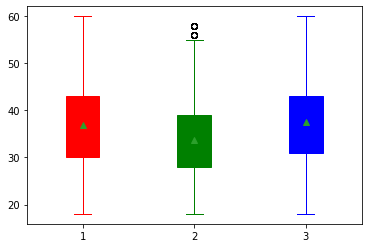

In [21]:
# Boxplot of overall age, age of employees with attrition and age of employees without attrition
data = [dataset.Age,data_y.Age,data_n.Age]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)

Overall, Age is normally distributed without any outliers.

But, the age of the employees with attrition have 2 outliers and is near to normal.

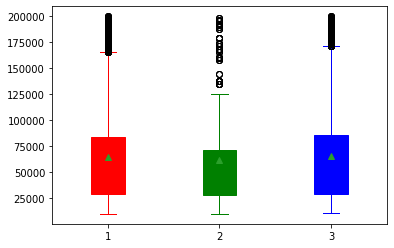

In [22]:
#plt.boxplot(dataset.MonthlyIncome)
data = [dataset.MonthlyIncome,data_y.MonthlyIncome,data_n.MonthlyIncome]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)

Overall, Monthly Income is Right skewed with many outliers.

The Monthly Income of the employees with attrition is right skewed with many outliers.

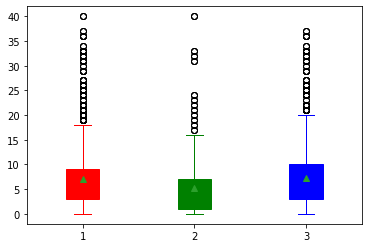

In [23]:

# Boxplot of overall YearsAtCompany, YearsAtCompanyof employees with attrition and YearsAtCompany of employees without attrition
data = [dataset.YearsAtCompany,data_y.YearsAtCompany,data_n.YearsAtCompany]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)


Years at company is also Right Skewed with several outliers observed.

# Stage - 4: Visualisation

Age : Attrition

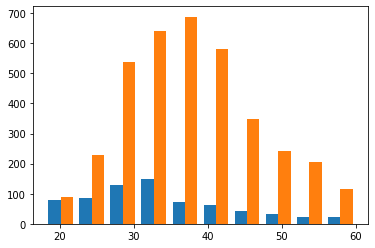

In [24]:
x=data_y.Age
y=data_n.Age
bins=10
plt.hist([x, y], bins, label=['YES', 'No'])
plt.show()

Most of the employees who left the company(with attrition) are younger.

## Business Travel:Attrition

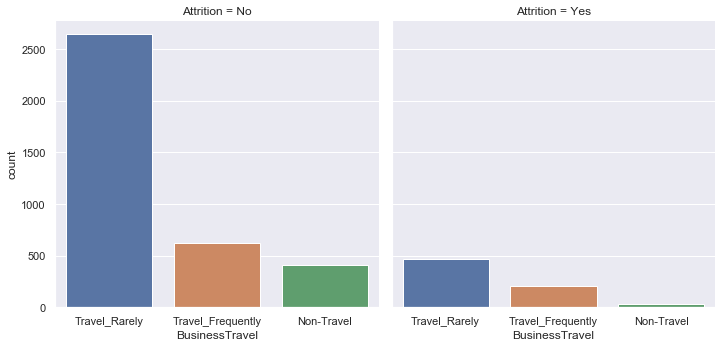

In [25]:
import seaborn as sns
sns.set(style="darkgrid")
g = sns.catplot(x="BusinessTravel", col="Attrition",
                data=dataset, kind="count"
                );

The employees who travel rarely have lesser attrition rates.

## Department : Attrition

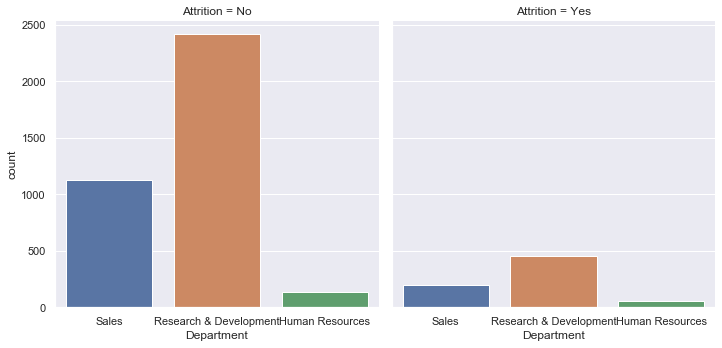

In [26]:
g = sns.catplot(x="Department", col="Attrition",
                data=dataset, kind="count"
                );

# inference 

For the employess who have left the company(with attrition) Age,NumCompaniesWorked,PercentSalaryHike are platykurtic.